# EE634 Intro to Neural Networks
# Assignment #1: Neural Network for Breast Cancer
# Zachary Chou
## Fall 2023

In [1]:
# Import libraries numpy, pandas, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Read the csv file into the two-dimensional array 
data = np.genfromtxt('breast-cancer-wisconsin.data.csv',delimiter = ',')

print(data) 

[[1.000025e+06 5.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.002945e+06 5.000000e+00 4.000000e+00 ... 2.000000e+00 1.000000e+00
  2.000000e+00]
 [1.015425e+06 3.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 ...
 [8.888200e+05 5.000000e+00 1.000000e+01 ... 1.000000e+01 2.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 6.000000e+00 1.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 4.000000e+00 1.000000e+00
  4.000000e+00]]


In [3]:
# print the shape of the array
print(data.shape)

(699, 11)


In [4]:
# print the first 5 rows of the array
print(data[0:5,:])

[[1.000025e+06 5.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00 1.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.002945e+06 5.000000e+00 4.000000e+00 4.000000e+00 5.000000e+00
  7.000000e+00 1.000000e+01 3.000000e+00 2.000000e+00 1.000000e+00
  2.000000e+00]
 [1.015425e+06 3.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00 2.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.016277e+06 6.000000e+00 8.000000e+00 8.000000e+00 1.000000e+00
  3.000000e+00 4.000000e+00 3.000000e+00 7.000000e+00 1.000000e+00
  2.000000e+00]
 [1.017023e+06 4.000000e+00 1.000000e+00 1.000000e+00 3.000000e+00
  2.000000e+00 1.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00]]


In [5]:
# Assign to the array "X" the features from the array 
X = data[:,:-1]
display(X)
print(X.shape)

array([[1.000025e+06, 5.000000e+00, 1.000000e+00, ..., 3.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.002945e+06, 5.000000e+00, 4.000000e+00, ..., 3.000000e+00,
        2.000000e+00, 1.000000e+00],
       [1.015425e+06, 3.000000e+00, 1.000000e+00, ..., 3.000000e+00,
        1.000000e+00, 1.000000e+00],
       ...,
       [8.888200e+05, 5.000000e+00, 1.000000e+01, ..., 8.000000e+00,
        1.000000e+01, 2.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 1.000000e+01,
        6.000000e+00, 1.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 1.000000e+01,
        4.000000e+00, 1.000000e+00]])

(699, 10)


In [6]:
# Assign to the array "y" the labels from the array 
y = data[:,10]
display(y)
print(y.shape)

array([2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 4., 4., 2.,
       2., 4., 2., 4., 4., 2., 4., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2.,
       2., 2., 4., 2., 4., 4., 2., 4., 4., 4., 4., 2., 4., 2., 2., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 2., 4., 2., 4.,
       4., 2., 2., 4., 2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4.,
       4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4.,
       2., 4., 4., 4., 4., 4., 2., 4., 2., 4., 4., 4., 2., 2., 2., 4., 2.,
       2., 2., 2., 4., 4., 4., 2., 4., 2., 4., 2., 2., 2., 4., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 4., 2., 2., 4., 2., 4., 4.,
       2., 2., 4., 2., 2., 2., 4., 4., 2., 2., 2., 2., 2., 4., 4., 2., 2.,
       2., 2., 2., 4., 4., 4., 2., 4., 2., 4., 2., 2., 2., 4., 4., 2., 4.,
       4., 4., 2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 2., 2.,
       2., 4., 4., 2., 2., 2., 4., 4., 2., 4., 4., 4., 2., 2., 4., 2., 2.,
       4., 4., 4., 4., 2.

(699,)


In [7]:
# Converting the y array items from 2 and 4 to 1 and 2
y[y == 2] = 0
y[y == 4] = 1
display(y)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0.

In [8]:
# Shuffle the rows of the array
print(np.random.shuffle(X))
display(X)
print(np.random.shuffle(y))
display(y)

None


array([[1.115762e+06, 3.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.190485e+06, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.184241e+06, 2.000000e+00, 1.000000e+00, ..., 2.000000e+00,
        1.000000e+00, 1.000000e+00],
       ...,
       [3.908400e+05, 8.000000e+00, 4.000000e+00, ..., 3.000000e+00,
        9.000000e+00, 2.000000e+00],
       [1.222464e+06, 6.000000e+00, 1.000000e+01, ..., 7.000000e+00,
        1.000000e+01, 1.000000e+00],
       [1.197510e+06, 5.000000e+00, 1.000000e+00, ..., 3.000000e+00,
        1.000000e+00, 1.000000e+00]])

None


array([1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1.

In [9]:
# Split the data into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify = y)

print("X_train= \n", X_train)
print("\nX_test= \n", X_test)
print("\ny_train= \n", y_train)
print("\ny_test= \n", y_test)

X_train= 
 [[1.183240e+06 4.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 [1.293439e+06 6.000000e+00 9.000000e+00 ... 4.000000e+00 2.000000e+00
  1.000000e+00]
 [1.103722e+06 1.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  2.000000e+00]
 ...
 [4.669060e+05 1.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.205138e+06 5.000000e+00 8.000000e+00 ... 7.000000e+00 8.000000e+00
  1.000000e+00]
 [1.168359e+06 8.000000e+00 2.000000e+00 ... 7.000000e+00 1.000000e+00
  1.000000e+00]]

X_test= 
 [[1.018099e+06 1.000000e+00 1.000000e+00 ... 3.000000e+00 1.000000e+00
  1.000000e+00]
 [1.214556e+06 3.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 [1.368273e+06 1.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 ...
 [1.018561e+06 2.000000e+00 1.000000e+00 ... 3.000000e+00 1.000000e+00
  1.000000e+00]
 [6.364370e+05 1.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.352663

In [10]:
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(559, 10)
(140, 10)
(559,)
(140,)


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# The number of epochs that are requied to reduce the error to a minimum is 12 since anything 
# less than 12 throws a convergence warning saying that it has not converged yet

Accuracy: 0.6571428571428571
Confusion matrix:
 [[92  0]
 [48  0]]


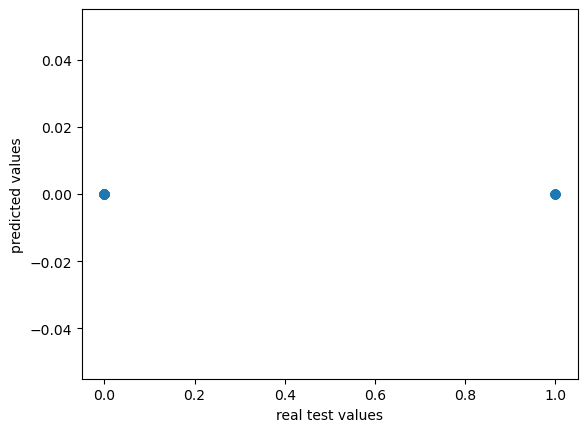

In [12]:
# Shows the loss plot as the function of the number of iterations with the 20% test data size 
# and the use of the cross-entropy to evaluate the loss
plt.scatter(y_test,y_pred)
plt.xlabel('real test values')
plt.ylabel('predicted values')
plt.show()

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6571428571428571
Confusion matrix:
 [[92  0]
 [48  0]]


In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.34285714285714286
Confusion matrix:
 [[ 0 92]
 [ 0 48]]


In [15]:
# Splitting into difference percentage of test sizes - 60%/40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=47, stratify = y)

print("X_train= \n", X_train)
print("\nX_test= \n", X_test)
print("\ny_train= \n", y_train)
print("\ny_test= \n", y_test)

X_train= 
 [[1.238186e+06 4.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 [1.277145e+06 5.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.217717e+06 5.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 ...
 [1.121919e+06 5.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 [1.168359e+06 8.000000e+00 2.000000e+00 ... 7.000000e+00 1.000000e+00
  1.000000e+00]
 [1.257608e+06 6.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]]

X_test= 
 [[1.193683e+06 1.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.184586e+06 4.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 [1.156017e+06 3.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 ...
 [1.183983e+06 9.000000e+00 5.000000e+00 ... 4.000000e+00 3.000000e+00
  3.000000e+00]
 [1.293439e+06 3.000000e+00 2.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.211202

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6535714285714286
Confusion matrix:
 [[183   0]
 [ 97   0]]


In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6535714285714286
Confusion matrix:
 [[183   0]
 [ 97   0]]


In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3464285714285714
Confusion matrix:
 [[  0 183]
 [  0  97]]


In [19]:
# Splitting into different percentage of test sizes - 90%/10%
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=47, stratify = y)

print("X_train= \n", X_train)
print("\nX_test= \n", X_test)
print("\ny_train= \n", y_train)
print("\ny_test= \n", y_test)

X_train= 
 [[1.116116e+06 9.000000e+00 1.000000e+01 ... 3.000000e+00 3.000000e+00
  1.000000e+00]
 [1.183516e+06 3.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.110524e+06 1.000000e+01 5.000000e+00 ... 7.000000e+00 1.000000e+00
  1.000000e+00]
 ...
 [4.669060e+05 1.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.156017e+06 3.000000e+00 1.000000e+00 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 [1.168359e+06 8.000000e+00 2.000000e+00 ... 7.000000e+00 1.000000e+00
  1.000000e+00]]

X_test= 
 [[1.116192e+06 5.000000e+00 1.000000e+00 2.000000e+00 1.000000e+00
  2.000000e+00 1.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00]
 [1.160476e+06 2.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00 1.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00]
 [6.364370e+05 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00]
 [7.040970e+05 1.000000e+00 1.000000e+00 1.00

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6571428571428571
Confusion matrix:
 [[46  0]
 [24  0]]


In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6571428571428571
Confusion matrix:
 [[46  0]
 [24  0]]


In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=12, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6571428571428571
Confusion matrix:
 [[46  0]
 [24  0]]


Root Mean Squared Error is:  0.5855400437691199


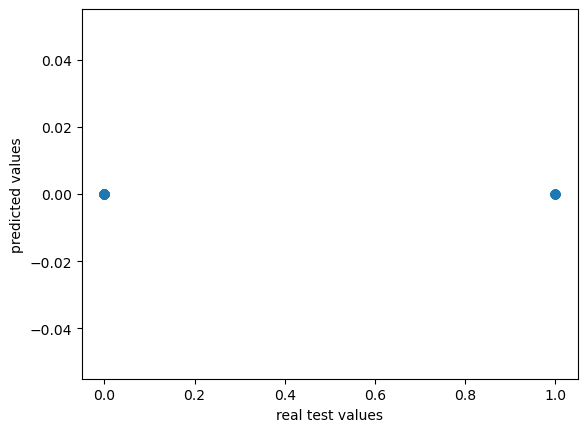

In [23]:
# Doing the different cost function with the 0.2 test size 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify = y)

predictions = mlp.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error is: ',RMSE)

# Shows the loss plot as the function of the number of iterations with the 20% test data size 
# and the use of the RMSE to evaluate the loss
plt.scatter(y_test,predictions)
plt.xlabel('real test values')
plt.ylabel('predicted values')
plt.show()

In [24]:
# The use of the batch size of 32 is with the 20% test size of the data. Will also show the accuracy and 8
# neurons in the one hidden layer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify = y)

mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=12, random_state=42,batch_size = 32)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6571428571428571
Confusion matrix:
 [[92  0]
 [48  0]]


In [25]:
# The same as above but for a batch size of 64
mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=12, random_state=42,batch_size = 64)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6571428571428571
Confusion matrix:
 [[92  0]
 [48  0]]


## DUE DATE: Wednesday, September 13, 2023